#### Example of analysis of data obtained from experiment of Wax Appearance Temperature determination. 
Log file contains experimental data. During the experiment, the laser was passed through an oil sample with an isobaric temperature decrease. 
The inflection point indicates the formation of paraffin crystals.

##### Folowing steps were taken:
- Reading data from log file
- Data visualisation
- Finding inflection point
- Fitting data to the trend lines
- Calculating cross-point of trend lines

##### [Ramer-Douglas-Peucker algorithm](https://pypi.python.org/pypi/rdp/)  was used to find inflection point 

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv('WAT_log_file.csv')


In [2]:
#1. Look at the data
# relevant columns: Temperature, Power(W)
df.head()

,Time(min),Power(W),Temperature,Pressure,Volume,Concentration(%),Cyl(1),Cyl(2),Bath,Comments
0,0.10,0.000241,88.3,4177,0.000,NaN,-32768,-32768,0,NaN
1,0.20,0.000241,88.4,4177,-0.001,#NAME?,-32768,-32768,0,NaN
2,0.30,0.000241,88.4,4177,-0.003,#NAME?,-32768,-32768,0,NaN
3,0.40,0.000241,88.4,4177,-0.003,#NAME?,-32768,-32768,0,NaN
4,0.51,0.000241,88.4,4177,-0.003,#NAME?,-32768,-32768,0,NaN


In [3]:
df.describe()

,Time(min),Power(W),Temperature,Pressure,Volume,Cyl(1),Cyl(2),Bath,Comments
count,10542.000000,1.054200e+04,10542.000000,10542.000000,10542.000000,10542.0,10542.0,10542.0,0.0
mean,531.920597,2.159878e-04,48.650275,4177.305635,8.057862,-32768.0,-32768.0,0.0,NaN
std,306.696100,8.722547e-05,25.279945,0.839408,5.309835,0.0,0.0,0.0,NaN
min,0.100000,1.220000e-08,8.400000,4174.000000,-0.009000,-32768.0,-32768.0,0.0,NaN
25%,266.705000,2.440000e-04,26.100000,4177.000000,3.198750,-32768.0,-32768.0,0.0,NaN
50%,532.040000,2.510000e-04,48.500000,4177.000000,7.916000,-32768.0,-32768.0,0.0,NaN
75%,797.565000,2.560000e-04,72.000000,4178.000000,12.706000,-32768.0,-32768.0,0.0,NaN
max,1062.540000,2.630000e-04,88.400000,4180.000000,16.871000,-32768.0,-32768.0,0.0,NaN


(0, 0.0003)

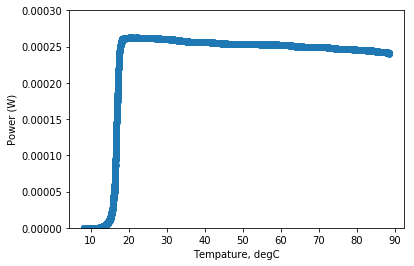

In [4]:
#2. Plot data
plt.scatter(df['Temperature'], df['Power(W)'])
plt.xlabel('Tempature, degC')
plt.ylabel('Power (W)')
plt.ylim(0, 0.0003)
#y limit - some arbitrary number

#Inflection point somewhere in area 20 degC indicates Wax Appearance Temperature

In [5]:
#3. Find Inflection point with Ramer-Douglas-Peucker algorithm 
from rdp import rdp
points = list(zip(df['Temperature'],df['Power(W)']))

#find index of inflection point
Inflection_point = df['Temperature'][df['Temperature']==rdp(points, 0.0002)[1][0]].index[-1]
print ('Inflection point {0} deg C'.format(rdp(points, 0.0002)[1][0]))


Inflection point 18.8 deg C


(0, 0.0003)

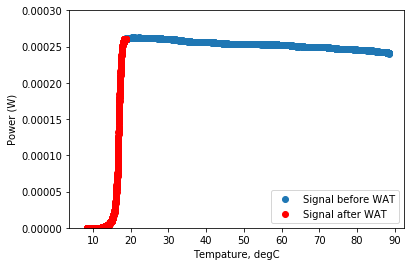

In [6]:
#Visually check if inflection point was find correctly
plt.scatter(df['Temperature'][:Inflection_point], df['Power(W)'][:Inflection_point], label = 'Signal before WAT')
plt.scatter(df['Temperature'][Inflection_point:], df['Power(W)'][Inflection_point:],label = 'Signal after WAT', color='r')
plt.xlabel('Tempature, degC')
plt.ylabel('Power (W)')
plt.legend()
plt.ylim(0, 0.0003)

equations:  [ -2.83857930e-07   2.68204717e-04] [  8.99834327e-05  -1.37654737e-03]
Cross point =  18.2209090469


(0, 0.0003)

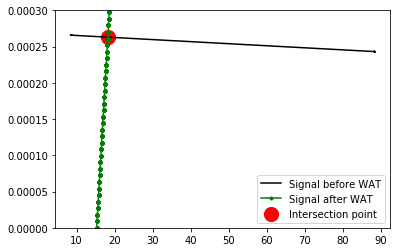

In [7]:
#4 Make trend lines
#9200 - arbitrary number to cut irrelevant tail
Eq1 = np.polyfit(df['Temperature'][:Inflection_point], df['Power(W)'][:Inflection_point], 1)
Y1 = [i*Eq1[0]+Eq1[1] for i in df['Temperature']]
Eq2 = np.polyfit(df['Temperature'][Inflection_point:9200], df['Power(W)'][Inflection_point:9200], 1)
Y2 = [i*Eq2[0]+Eq2[1] for i in df['Temperature']]

#5 Find cross points of trendlines
print ('equations: ',Eq1,Eq2)
a,b=list(Eq1)
c,d=list(Eq2)
x0=(d-b)/(a-c)
print ('Cross point = ',x0)


#Plot all together
plt.plot(df['Temperature'],Y1,'-', label = 'Signal before WAT', color = 'black')
plt.plot(df['Temperature'],Y2,'.-', label = 'Signal after WAT', color ='green')
plt.scatter(x0,Eq1[0]*x0+Eq1[1], color = 'red', s = 200, 
            label = 'Intersection point')
plt.legend()
plt.ylim(0, 0.0003)



### As result inflection point 18.8 degc with RDP altorith, and trend lines cross-point 18.2 degC 